In [1]:
from strsimpy.normalized_levenshtein import NormalizedLevenshtein

normalized_levenshtein = NormalizedLevenshtein()
print(normalized_levenshtein.distance('My string', 'My $string'))
print(normalized_levenshtein.distance('My string', 'My $string'))
print(normalized_levenshtein.distance('My string', 'My $string'))

print(normalized_levenshtein.similarity('My string', 'My $string'))
print(normalized_levenshtein.similarity('My string', 'My $string'))
print(normalized_levenshtein.similarity('My string', 'My $string'))
# get original transcript

0.1
0.1
0.1
0.9
0.9
0.9


In [2]:
transcript_id = '10_0991_331330'
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import WhitespaceTokenizer

def read_transcript_from_id(transcript_id):

    path_to_data_folder = '/archive/shared/sim_center/shared/ameer/'
    # lookinto this dictionary to find the path
    # can also manually create the path and it would be faster but not by much
    merged_lookup = pd.read_csv(path_to_data_folder + 'grade_lookupv5.csv')
    transcript = ''

    path = merged_lookup[merged_lookup.id == transcript_id].path.iloc[0]
    with open(path, 'r') as file:
        lines = file.readlines()
    for line in lines:
        if line != '\n':
            tok_line = line.split(' ')
            for i in range(len(tok_line)):
                transcript += ' ' + tok_line[i]


    return transcript

In [3]:
diarized_transcript = '/archive/shared/sim_center/shared/annie/GPT4 3-chunk/'
id = '01_0542_298135'
def reconstruct_transcript(path, id): 
    path = path + id + '.txt'
    with open(path, 'r') as file:
        lines = file.readlines()
 
    out = []
    
    for line in lines:
        if line.find(':')==-1: continue
        temp = {}
        temp['speaker'] = line[:line.find(':')]
        temp['text'] = line[line.find(':') + 1: ]
        out.append(temp)

    return out

In [4]:
diar = reconstruct_transcript(diarized_transcript, id)

In [5]:
golden_transcript = '/archive/shared/sim_center/shared/annie/gold-standard-diarized/'
id = '01_0542_298135'

gold = reconstruct_transcript(golden_transcript, id)

In [6]:
def consolidate_transcript(transcript):
    
    new = []
    new.append({'speaker': transcript[0]['speaker'], 'text': transcript[0]['text']})
    
    for i in range(1, len(transcript)):
        this = {}
        if transcript[i]['speaker'] == transcript[i-1]['speaker']:
            new[-1]['text'] += transcript[i]['text']
        else:
            this['speaker'] = transcript[i]['speaker']
            this['text'] = transcript[i]['text']
            new.append(this)
    
    return new

In [7]:
diar = consolidate_transcript(diar)

In [8]:
gold = consolidate_transcript(gold)

In [9]:
gold

[{'speaker': 'ID', 'text': ' 01_0542_298135\n'},
 {'speaker': 'Instructions',
  'text': ' Learners, you may begin your patient station. Please remove your cover sheet, jot down any notes, knock, and then enter. Thank you.\n'},
 {'speaker': 'Patient', 'text': " so so I don't know. Hello?\n"},
 {'speaker': 'Student', 'text': ' Hi, this is Mrs. Miller.\n'},
 {'speaker': 'Patient', 'text': ' Yes, yes it is.\n'},
 {'speaker': 'Student',
  'text': " Hi Mrs Miller, my name is Jackson Agroz. I'm the medical student working at the clinic today. I am calling to speak about your daughter. \n"},
 {'speaker': 'Patient', 'text': ' What was your name again?\n'},
 {'speaker': 'Student', 'text': ' Jackson Agrroz.\n Okay. Your S-47024. \n'},
 {'speaker': 'Patient', 'text': " That's your OSCE number?\n"},
 {'speaker': 'Student',
  'text': ' 427024, yes.\n Okay, well, OSCENumber21, sorry.\n'},
 {'speaker': 'Patient',
  'text': " There we go, thank you.\n Well, I am glad you called. I was very worried beca

In [10]:
def eval_transcript(ids):
    scores = {}
    diar_path = '/archive/shared/sim_center/shared/annie/GPT4 3-chunk/' # change as needed
    gold_path = '/archive/shared/sim_center/shared/annie/gold-standard-diarized/'
    for id in ids:
        print(id)
        diar = consolidate_transcript(reconstruct_transcript(diar_path, id))
        gold = consolidate_transcript(reconstruct_transcript(gold_path, id))
        distance = normalized_levenshtein.distance(diar, gold)
        similarity = normalized_levenshtein.similarity(diar, gold)
        scores[id] = [distance, similarity]
    return scores

In [11]:
ids = ['01_0542_298135',
'01_1080_366142',
'02_0036_174595',
'02_1056_380177',
'03_0028_174553',
'04_0043_174686',
'05_0033_174804',
'06_0079_175106',
'07_0068_174641',
'08_0029_174576',
'09_0029_174582',
]

In [12]:
results = eval_transcript(ids)

01_0542_298135
01_1080_366142
02_0036_174595
02_1056_380177
03_0028_174553
04_0043_174686
05_0033_174804
06_0079_175106
07_0068_174641
08_0029_174576
09_0029_174582


In [13]:
results

{'01_0542_298135': [0.18604651162790697, 0.813953488372093],
 '01_1080_366142': [0.2345679012345679, 0.7654320987654322],
 '02_0036_174595': [0.5279503105590062, 0.4720496894409938],
 '02_1056_380177': [0.3867924528301887, 0.6132075471698113],
 '03_0028_174553': [0.22772277227722773, 0.7722772277227723],
 '04_0043_174686': [0.2900763358778626, 0.7099236641221374],
 '05_0033_174804': [0.2782608695652174, 0.7217391304347827],
 '06_0079_175106': [0.37681159420289856, 0.6231884057971014],
 '07_0068_174641': [0.41721854304635764, 0.5827814569536424],
 '08_0029_174576': [0.1038961038961039, 0.8961038961038961],
 '09_0029_174582': [0.2348993288590604, 0.7651006711409396]}

In [14]:
[results[token][0] for token in results]

[0.18604651162790697,
 0.2345679012345679,
 0.5279503105590062,
 0.3867924528301887,
 0.22772277227722773,
 0.2900763358778626,
 0.2782608695652174,
 0.37681159420289856,
 0.41721854304635764,
 0.1038961038961039,
 0.2348993288590604]

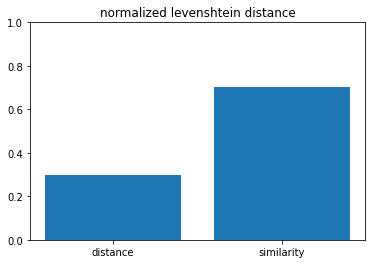

In [15]:
import matplotlib.pyplot as plt
import numpy as np
avg_dist = np.mean([results[token][0] for token in results])
avg_sim = np.mean([results[token][1] for token in results])
measures = ['distance', 'similarity']
plt.bar(measures, [avg_dist, avg_sim])
plt.ylim(0, 1)
plt.title("normalized levenshtein distance")
plt.show()

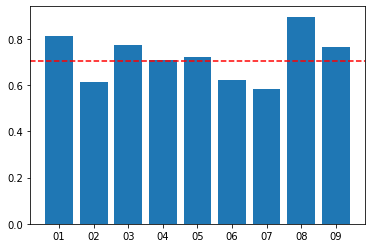

In [16]:
plt.bar([id[:2] for id in ids], [results[token][1] for token in results])
plt.axhline(y = avg_sim, color = 'r', linestyle = '--')
plt.show()

In [17]:
ids = ['01_0542_298135',
#'01_1080_366142',
'02_0036_174595',
#'02_1056_380177',
'03_0028_174553',
'04_0043_174686',
'05_0033_174804',
'06_0079_175106',
'07_0068_174641',
'08_0029_174576',
'09_0029_174582',
]

01_0542_298135
02_0036_174595
03_0028_174553
04_0043_174686
05_0033_174804
06_0079_175106
07_0068_174641
08_0029_174576
09_0029_174582


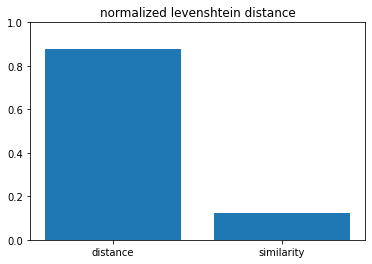

In [18]:
def eval_transcript(ids):
    scores = {}
    diar_path = '/archive/shared/sim_center/shared/annie/GPT3.5 complete/' # change as needed
    gold_path = '/archive/shared/sim_center/shared/annie/gold-standard-diarized/'
    for id in ids:
        print(id)
        diar = consolidate_transcript(reconstruct_transcript(diar_path, id))
        gold = consolidate_transcript(reconstruct_transcript(gold_path, id))
        distance = normalized_levenshtein.distance(diar, gold)
        similarity = normalized_levenshtein.similarity(diar, gold)
        scores[id] = [distance, similarity]
    return scores

results35 = eval_transcript(ids)
import matplotlib.pyplot as plt
import numpy as np
avg_dist35 = np.mean([results35[token][0] for token in results35])
avg_sim35 = np.mean([results35[token][1] for token in results35])
measures = ['distance', 'similarity']
plt.bar(measures, [avg_dist35, avg_sim35])
plt.ylim(0, 1)
plt.title("normalized levenshtein distance")
plt.show()

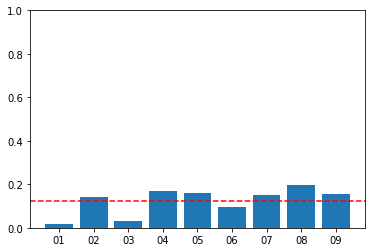

In [19]:
plt.bar([id[:2] for id in ids], [results35[token][1] for token in results35])
plt.axhline(y = avg_sim35, color = 'r', linestyle = '--')
plt.ylim(0, 1)
plt.show()

In [20]:
consolidate_transcript(reconstruct_transcript('/archive/shared/sim_center/shared/annie/GPT3.5 complete/', ids[0]))

[{'speaker': 'ID', 'text': ' 01_0542_298135\n'},
 {'speaker': 'Student',
  'text': " Thank you. I'm sorry. Are you Mr. Daniel? \n"},
 {'speaker': 'Patient', 'text': ' Yes. \n'},
 {'speaker': 'Student',
  'text': " Hi, Mr. Daniel. My name's Kelsey. I am a medical student here in the clinic. \n"},
 {'speaker': 'Patient', 'text': ' Kelsey, yes. Kelsey? \n'},
 {'speaker': 'Student',
  'text': " Kelsey yes, it's right there. Okay. If it is okay with you, I would like to just ask you a few questions about what brought you in today and then do a physical exam. \n"},
 {'speaker': 'Patient', 'text': ' Sounds good. \n'},
 {'speaker': 'Student',
  'text': ' Okay, so what brought you to the clinic today? \n'},
 {'speaker': 'Patient', 'text': ' I had ECIs and a runny nose. \n'},
 {'speaker': 'Student',
  'text': ' ECI and runny nose, okay. And when did that start? \n'},
 {'speaker': 'Patient', 'text': ' About two months ago. \n'},
 {'speaker': 'Student',
  'text': ' Two months. Two weeks ago? Was t

01_0542_298135
02_0036_174595
03_0028_174553
04_0043_174686
05_0033_174804
06_0079_175106
07_0068_174641
08_0029_174576
09_0029_174582


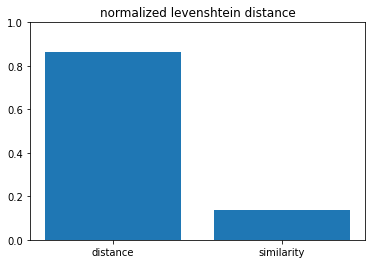

In [21]:
def eval_transcript(ids):
    scores = {}
    diar_path = '/archive/shared/sim_center/shared/annie/mixtral/' # change as needed
    gold_path = '/archive/shared/sim_center/shared/annie/gold-standard-diarized/'
    for id in ids:
        print(id)
        diar = consolidate_transcript(reconstruct_transcript(diar_path, id))
        gold = consolidate_transcript(reconstruct_transcript(gold_path, id))
        distance = normalized_levenshtein.distance(diar, gold)
        similarity = normalized_levenshtein.similarity(diar, gold)
        scores[id] = [distance, similarity]
    return scores

resultsm = eval_transcript(ids)
import matplotlib.pyplot as plt
import numpy as np
avg_distm = np.mean([resultsm[token][0] for token in resultsm])
avg_simm = np.mean([resultsm[token][1] for token in resultsm])
measures = ['distance', 'similarity']
plt.bar(measures, [avg_distm, avg_simm])
plt.ylim(0, 1)
plt.title("normalized levenshtein distance")
plt.show()

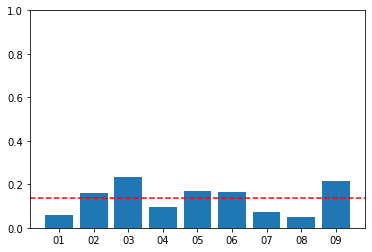

In [22]:
plt.bar([id[:2] for id in ids], [resultsm[token][1] for token in resultsm])
plt.axhline(y = avg_simm, color = 'r', linestyle = '--')
plt.ylim(0, 1)
plt.show()

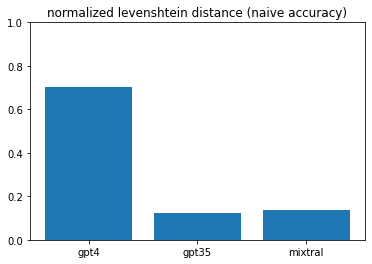

In [23]:
models = ['gpt4', 'gpt35', 'mixtral']
avg_sims = [avg_sim, avg_sim35, avg_simm]
plt.bar(models, avg_sims)
plt.ylim(0, 1)
plt.title("normalized levenshtein distance (naive accuracy)")
plt.show()

In [24]:
def eval_transcript(ids, diar_path='/archive/shared/sim_center/shared/annie/GPT4 3-chunk/'):
    scores = {}
    gold_path = '/archive/shared/sim_center/shared/annie/gold-standard-diarized/'
    for id in ids:
        # debugging statement: 
        # print(id) 
        diar = consolidate_transcript(reconstruct_transcript(diar_path, id))
        gold = consolidate_transcript(reconstruct_transcript(gold_path, id))
        distance = normalized_levenshtein.distance(diar, gold)
        similarity = normalized_levenshtein.similarity(diar, gold)
        scores[id] = [distance, similarity]
    return scores


In [25]:
ids = ['01_0542_298135',
'01_1080_366142',
'02_0036_174595',
'02_1056_380177',
'03_0028_174553',
'04_0043_174686',
'05_0033_174804',
'06_0079_175106',
'07_0068_174641',
'08_0029_174576',
'09_0029_174582',
]

In [26]:
results_3chunk = eval_transcript(ids)

diar_path='/archive/shared/sim_center/shared/annie/GPT4 6-chunk/'
results_6chunk = eval_transcript(ids, diar_path)

diar_path='/archive/shared/sim_center/shared/annie/GPT4 9-chunk/'
results_9chunk = eval_transcript(ids, diar_path)

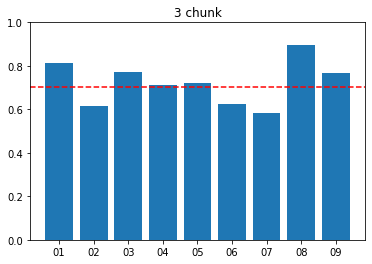

In [27]:
avg_dist3 = np.mean([results_3chunk[token][0] for token in results_3chunk])
avg_sim3 = np.mean([results_3chunk[token][1] for token in results_3chunk])
measures = ['distance', 'similarity']
plt.bar([id[:2] for id in ids], [results_3chunk[token][1] for token in results_3chunk])
plt.axhline(y = avg_sim3, color = 'r', linestyle = '--')
plt.ylim(0, 1)
plt.title("3 chunk")
plt.show()

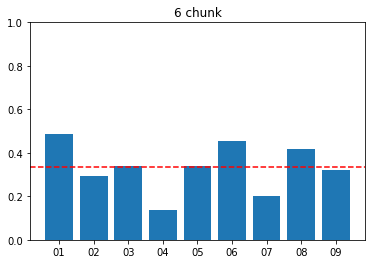

In [28]:
avg_dist6 = np.mean([results_6chunk[token][0] for token in results_6chunk])
avg_sim6 = np.mean([results_6chunk[token][1] for token in results_6chunk])
measures = ['distance', 'similarity']
plt.bar([id[:2] for id in ids], [results_6chunk[token][1] for token in results_6chunk])
plt.axhline(y = avg_sim6, color = 'r', linestyle = '--')
plt.ylim(0, 1)
plt.title("6 chunk")
plt.show()

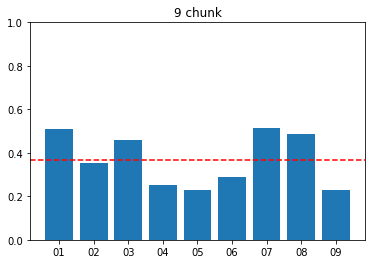

In [29]:
avg_dist9 = np.mean([results_9chunk[token][0] for token in results_9chunk])
avg_sim9 = np.mean([results_9chunk[token][1] for token in results_9chunk])
measures = ['distance', 'similarity']
plt.bar([id[:2] for id in ids], [results_9chunk[token][1] for token in results_9chunk])
plt.axhline(y = avg_sim9, color = 'r', linestyle = '--')
plt.ylim(0, 1)
plt.title("9 chunk")
plt.show()

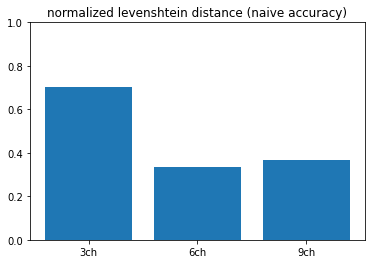

In [30]:
sizes = ['3ch', '6ch', '9ch']
avg_sims = [avg_sim3, avg_sim6, avg_sim9]
plt.bar(sizes, avg_sims)
plt.ylim(0, 1)
plt.title("normalized levenshtein distance (naive accuracy)")
plt.show()

In [38]:
this_id = ['10_0991_331330']
diar_path = '/archive/shared/sim_center/shared/annie/claude/'
claude_score = eval_transcript(this_id, diar_path=diar_path)
gpt4_score = eval_transcript(this_id)

In [39]:
claude_score

{'10_0991_331330': [0.7669172932330827, 0.23308270676691734]}

In [42]:
consolidate_transcript(reconstruct_transcript('/archive/shared/sim_center/shared/annie/claude/', this_id[0]))

[{'speaker': 'ID', 'text': ' 10_0991_331330\n'},
 {'speaker': 'Student',
  'text': " Hello, Mr. Pimbleton. Hi, my name is Coleman. I'm a medical student at UT Southwestern. I am here to ask you some questions. I just want to know how you are feeling today.\n"},
 {'speaker': 'Patient',
  'text': " I've been feeling sick to my stomach. Now I throw one up, I feel not good.\n"},
 {'speaker': 'Student', 'text': ' Okay, when did this start?\n'},
 {'speaker': 'Patient',
  'text': ' It started getting nauseous. I was feeling nausea. I had a stomachache. I felt nause up. I am not good.\n'},
 {'speaker': 'Student', 'text': ' Okay, when did this start?\n'},
 {'speaker': 'Patient',
  'text': ' I started getting nauseous two days ago. Threw up the first time yesterday after breakfast, about 20 minutes after I ate.\n'},
 {'speaker': 'Student', 'text': ' Any other episodes of vomiting?\n'},
 {'speaker': 'Patient',
  'text': ' Yeah, I threw up three or four times yesterday and then after breakfast tod

In [40]:
gpt4_score

{'10_0991_331330': [0.24060150375939848, 0.7593984962406015]}